In [6]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File to Load
file_to_load = "output_data/cleaned_avo.csv"

# Read Avocado File and store into Pandas data frame
avocado_data = pd.read_csv(file_to_load)

# Preview of the DataFrame
avocado_data.head()

,Unnamed: 0,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.70
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.92
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.80
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.52
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.69


In [7]:
avocado_data=avocado_data.rename(
                            columns={"4046":"Hass Small",
                                     "4225":"Hass Large",
                                     "4770":"Hass XLarge",
                                     'AveragePrice':'Average Price',
                                     'type':'Type',
                                     'year':'Year',
                                     'region':'Region'
                                    
                                    })
delete_row = avocado_data[avocado_data["Region"]=='TotalUS'].index
avocado_data = avocado_data.drop(delete_row)
avocado_data=avocado_data.drop(columns='Unnamed: 0',axis=1)
avocado_data['Total Sales']=''
Total=avocado_data['Average Price']*avocado_data['Total Volume']
avocado_data['Total Sales']=Total
avocado_data['Total Sales']= avocado_data['Total Sales'].map("${:.2f}".format)
avocado_data

,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,$85434.70
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,$74083.92
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,$109944.80
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,$85311.52
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,$65330.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17906,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,$27831.97
17907,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,$23748.55
17908,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,$25743.84
17909,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,$31276.07


In [8]:
avocado_data['Total Sales']=avocado_data['Total Sales'].str.replace('$',' ',regex=True).astype(float)

data15=avocado_data[avocado_data['Year']==2015].groupby('Region')
data16=avocado_data[avocado_data['Year']==2016].groupby('Region')
data17=avocado_data[avocado_data['Year']==2017].groupby('Region')
data18=avocado_data[avocado_data['Year']==2018].groupby('Region')

In [9]:
#totalvol(million)
T5=data15['Total Volume'].sum()/1000000
T6=data16['Total Volume'].sum()/1000000
T7=data17['Total Volume'].sum()/1000000
T8=data18['Total Volume'].sum()/1000000
totalvol_sum=pd.DataFrame({"2015": T5,
                            "2016":T6,
                              "2017":T7,
                              "2018":T8
                              })


([<matplotlib.axis.XTick at 0x10779b470>,
 <a list of 45 Text xticklabel objects>)

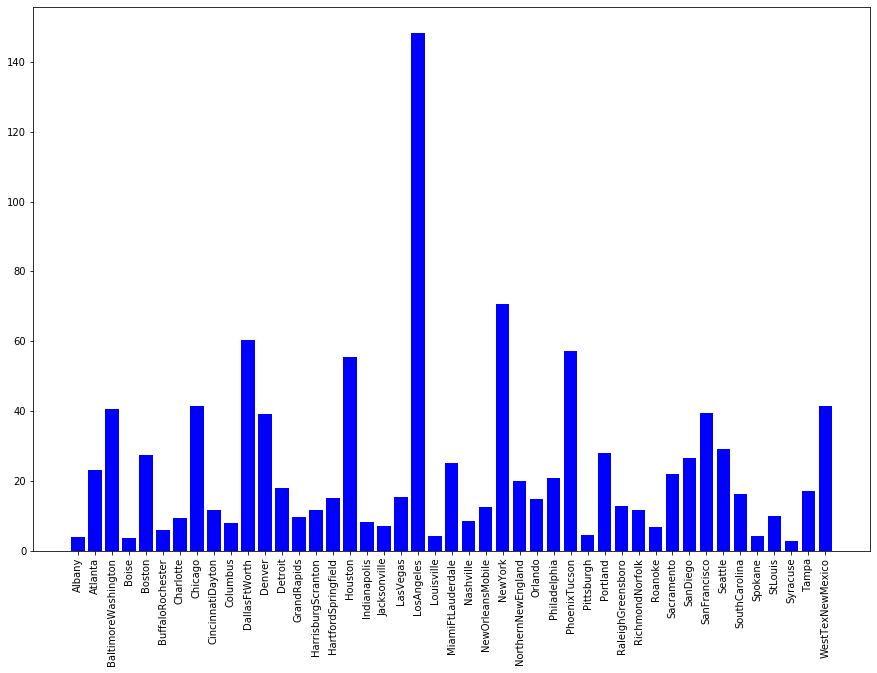

In [10]:
Without_8=totalvol_sum.drop(['California','GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West'])
x_axis = np.arange(len(Without_8))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,10))
plt.bar(x_axis,Without_8['2015'], color="b")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Without_8.index,rotation='vertical')



In [ ]:
top8=totalvol_sum.loc[['California','GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West']]
fig, ax = plt.subplots() 
top8.plot(kind='bar',figsize=(20,10),rot=0,fontsize=15,ax=ax).legend(loc='upper center')
ax.set(title="Top 8 Regions with Total Volume over 4 years",ylabel='Total Volume (Million)')
